In [91]:
import pandas as pd
df = pd.read_csv("customer.csv")

df.columns = df.columns.str.strip()
valid_ages = df[df['Age'] >= 18]['Age'].sort_values().reset_index(drop=True)
n = len(valid_ages)
if n % 2 == 1:
    median_age = valid_ages[n // 2]
else:
    median_age = (valid_ages[(n // 2) - 1] + valid_ages[n // 2]) / 2

print(f"\n Correctly Calculated Median Age (Age >= 18): {median_age}")

df['Age'] = df['Age'].apply(lambda x: median_age if x < 18 else x)
print("\n Final Cleaned Dataset (Age < 18 Replaced with Median):")
print(df[['Customer', 'Age']])



 Correctly Calculated Median Age (Age >= 18): 50.7398

 Final Cleaned Dataset (Age < 18 Replaced with Median):
   Customer      Age
0        A1  50.7398
1        A2  35.5346
2        A3  50.7398
3        A4  45.8203
4        A5  69.6639
..      ...      ...
95      A96  29.6316
96      A97  20.6118
97      A98  40.5390
98      A99  21.5887
99     A100  23.6076

[100 rows x 2 columns]


In [92]:
df.to_csv("customer_cleaned.csv", index=False)
df_cleaned = pd.read_csv("customer_cleaned.csv")

In [59]:
df.columns

Index(['Sl No:', 'Customer', 'Age', 'City', 'Credit Card Product', 'Limit',
       'Company', 'Segment'],
      dtype='object')

In [60]:
#df_customer_cleaned.columns = df_customer_cleaned.columns.str.strip()
df_customer_cleaned = pd.read_csv("customer_cleaned.csv")
df_customer_cleaned.columns = df_customer_cleaned.columns.str.strip()


df_spent=pd.read_csv('spent.csv')
df_spent.columns = df_spent.columns.str.strip()
df_spent['Month'] = pd.to_datetime(df_spent['Month'], format='%d-%b-%y', errors='coerce')
monthly_spent = df_spent.groupby(['Customer', 'Month'])['Amount'].sum().reset_index()
monthly_spent = monthly_spent.merge(df_customer_cleaned[['Customer', 'Limit']], on='Customer', how='left')
monthly_spent['Amount'] = pd.to_numeric(monthly_spent['Amount'], errors='coerce')
monthly_spent['Limit'] = pd.to_numeric(monthly_spent['Limit'], errors='coerce')
overspent = monthly_spent[monthly_spent['Amount'] > monthly_spent['Limit']]
if overspent.empty:
    print("No customers have overspent their credit limit in any month.")
else:
    print(" Customers who overspent their credit limit in any month:")
    print(overspent)


No customers have overspent their credit limit in any month.


In [61]:
df_spent['Month'] = pd.to_datetime(df_spent['Month'], format='%d-%b-%y')
monthly_spent = df_spent.groupby(['Customer', df_spent['Month'].dt.to_period('M')])['Amount'].sum().reset_index()
monthly_spent = monthly_spent.merge(df_customer_cleaned[['Customer']], on='Customer', how='left')
print(monthly_spent)


    Customer    Month   Amount
0         A1  2004-01  1511173
1         A1  2004-02    41381
2         A1  2004-05   131197
3         A1  2005-01   398404
4         A1  2005-02  1404194
..       ...      ...      ...
802      A95  2004-01   347834
803      A96  2004-01   320364
804      A97  2004-01   164330
805      A98  2004-01    87484
806      A99  2004-01   476020

[807 rows x 3 columns]


In [63]:
df_spent['Month'] = pd.to_datetime(df_spent['Month'], format='%d-%b-%y')
monthly_repayment = df_spent.groupby(['Customer', df_spent['Month'].dt.to_period('M')])['Amount'].sum().reset_index()
monthly_repayment = monthly_repayment.merge(df_customer_cleaned[['Customer']], on='Customer', how='left')
print(monthly_repayment)


    Customer    Month   Amount
0         A1  2004-01  1511173
1         A1  2004-02    41381
2         A1  2004-05   131197
3         A1  2005-01   398404
4         A1  2005-02  1404194
..       ...      ...      ...
802      A95  2004-01   347834
803      A96  2004-01   320364
804      A97  2004-01   164330
805      A98  2004-01    87484
806      A99  2004-01   476020

[807 rows x 3 columns]


In [90]:
df_spent['Month'] = pd.to_datetime(df_spent['Month'], format='%d-%b-%y')
df_spent['Year-Month'] = df_spent['Month'].dt.to_period('M')
monthly_spent = df_spent.groupby(['Year-Month', 'Customer'])['Amount'].sum().reset_index()
top_10_monthly_spent = (
    monthly_spent.sort_values(['Year-Month', 'Amount'], ascending=[True, False])
    .groupby('Year-Month')
    .head(10)
    .reset_index(drop=True)
)
print(" Top 10 Highest Paying Customers for Each Month:")
print(top_10_monthly_spent)



 Top 10 Highest Paying Customers for Each Month:
    Year-Month Customer   Amount
0      2004-01      A37  2605015
1      2004-01      A39  2417495
2      2004-01      A60  2245218
3      2004-01      A40  2233136
4      2004-01      A22  2126633
..         ...      ...      ...
295    2006-12      A36   255209
296    2006-12      A16   220259
297    2006-12      A28   188699
298    2006-12      A35   140924
299    2006-12      A51   123277

[300 rows x 3 columns]


In [65]:
df_spent['Month'] = pd.to_datetime(df_spent['Month'], format='%d-%b-%y')
df_merged = df_spent.merge(df_customer_cleaned[['Customer', 'Segment']], on='Customer', how='left')
df_merged['Year-Month'] = df_merged['Month'].dt.to_period('M')
monthly_segment_spending = df_merged.groupby(['Year-Month', 'Segment'])['Amount'].sum().reset_index()
top_segment_per_month = monthly_segment_spending.loc[monthly_segment_spending.groupby('Year-Month')['Amount'].idxmax()]
print("Top segment for each month based on spending:")
print(top_segment_per_month)


Top segment for each month based on spending:
    Year-Month        Segment    Amount
1      2004-01  Normal Salary  22394595
6      2004-02  Normal Salary   2841896
13     2004-03   Salaried_Pvt   1277308
17     2004-04   Salaried_MNC   2262438
20     2004-05           Govt   1593276
26     2004-09  Normal Salary   1212599
31     2004-11  Normal Salary   1431529
34     2005-01           Govt   2323803
43     2005-02  Self Employed  10745033
47     2005-04   Salaried_Pvt   3558552
50     2005-05  Normal Salary   9952875
54     2005-06           Govt   2876111
61     2005-07   Salaried_MNC   1557177
65     2005-08  Normal Salary   2417785
73     2005-09  Self Employed    988659
75     2005-10  Normal Salary   1487898
82     2005-11   Salaried_Pvt   3777193
84     2005-12           Govt   1169055
90     2006-01   Salaried_Pvt   1710222
92     2006-02           Govt   3956979
98     2006-03  Normal Salary  16877931
106    2006-04  Self Employed   6241180
108    2006-05  Normal Salary   55

In [66]:
df_spent['Month'] = pd.to_datetime(df_spent['Month'], format='%d-%b-%y')
df_merged = df_spent.merge(df_customer_cleaned[['Customer', 'Age']], on='Customer', how='left')
def age_group(age):
    if age < 18:
        return 'Under 18'
    elif 18 <= age < 30:
        return '18-29'
    elif 30 <= age < 40:
        return '30-39'
    elif 40 <= age < 50:
        return '40-49'
    elif 50 <= age < 60:
        return '50-59'
    else:
        return '60+'

df_merged['Age Group'] = df_merged['Age'].apply(age_group)
df_merged['Year-Month'] = df_merged['Month'].dt.to_period('M')
monthly_age_group_spending = df_merged.groupby(['Year-Month', 'Age Group'])['Amount'].sum().reset_index()
top_age_group_per_month = monthly_age_group_spending.loc[monthly_age_group_spending.groupby('Year-Month')['Amount'].idxmax()]
print("Top age group for each month based on spending:")
print(top_age_group_per_month)



Top age group for each month based on spending:
    Year-Month Age Group    Amount
3      2004-01     50-59  29135648
9      2004-02       60+   3475097
12     2004-03     50-59   2062436
18     2004-04       60+   2786092
21     2004-05     50-59   1682952
25     2004-09     50-59   1398309
31     2004-11       60+   1405797
35     2005-01       60+   2690232
39     2005-02     50-59  18200173
44     2005-04     50-59   3781561
50     2005-05       60+  15139051
54     2005-06     50-59   5408163
58     2005-07     50-59   1080132
63     2005-08       60+   3311193
68     2005-09       60+   1561269
71     2005-10     50-59   1379669
77     2005-11       60+   4246204
80     2005-12     50-59   1413231
84     2006-01     50-59   1991931
89     2006-02     50-59   3869516
95     2006-03       60+  17911703
100    2006-04       60+  10037120
105    2006-05       60+   5155014
109    2006-06       60+   2457525
113    2006-07     50-59   4390262
118    2006-08       60+   1094582
122    

In [67]:
df_spent['Month'] = pd.to_datetime(df_spent['Month'], format='%d-%b-%y')
df_merged = df_spent.merge(df_customer_cleaned[['Customer', 'Segment']], on='Customer', how='left')
df_merged['Year-Month'] = df_merged['Month'].dt.to_period('M')
monthly_segment_spending = df_merged.groupby(['Year-Month', 'Segment'])['Amount'].sum().reset_index()
most_profitable_per_month = monthly_segment_spending.loc[
    monthly_segment_spending.groupby('Year-Month')['Amount'].idxmax()
]


print("Most Profitable Segment for Each Month (Based on Total Spending):")
print(most_profitable_per_month)


Most Profitable Segment for Each Month (Based on Total Spending):
    Year-Month        Segment    Amount
1      2004-01  Normal Salary  22394595
6      2004-02  Normal Salary   2841896
13     2004-03   Salaried_Pvt   1277308
17     2004-04   Salaried_MNC   2262438
20     2004-05           Govt   1593276
26     2004-09  Normal Salary   1212599
31     2004-11  Normal Salary   1431529
34     2005-01           Govt   2323803
43     2005-02  Self Employed  10745033
47     2005-04   Salaried_Pvt   3558552
50     2005-05  Normal Salary   9952875
54     2005-06           Govt   2876111
61     2005-07   Salaried_MNC   1557177
65     2005-08  Normal Salary   2417785
73     2005-09  Self Employed    988659
75     2005-10  Normal Salary   1487898
82     2005-11   Salaried_Pvt   3777193
84     2005-12           Govt   1169055
90     2006-01   Salaried_Pvt   1710222
92     2006-02           Govt   3956979
98     2006-03  Normal Salary  16877931
106    2006-04  Self Employed   6241180
108    2006-05

In [68]:
df_spent['Month'] = pd.to_datetime(df_spent['Month'], dayfirst=True)
df_spent['Year-Month'] = df_spent['Month'].dt.to_period('M')
df_merged = df_spent.merge(df_customer_cleaned[['Customer', 'Segment']], on='Customer', how='left')
monthly_category_spend = df_merged.groupby(['Year-Month', 'Type'])['Amount'].sum().reset_index()
most_spent_category_monthly = monthly_category_spend.loc[
    monthly_category_spend.groupby('Year-Month')['Amount'].idxmax()
].reset_index(drop=True)
print("Most spent category each month:")
print(most_spent_category_monthly)


Most spent category each month:
   Year-Month          Type    Amount
0     2004-01        CAMERA  14644502
1     2004-02    BUS TICKET   2051643
2     2004-03        CAMERA   1308173
3     2004-04    BUS TICKET   1705406
4     2004-05        RENTAL   2390532
5     2004-09           CAR   1503815
6     2004-11         PETRO   1453271
7     2005-01        CAMERA   2108909
8     2005-02  TRAIN TICKET   6041679
9     2005-04  TRAIN TICKET   3456029
10    2005-05         PETRO   5794860
11    2005-06        CAMERA   4418063
12    2005-07        CAMERA   2090935
13    2005-08      SHOPPING   1525402
14    2005-09    AIR TICKET   1772252
15    2005-10    BUS TICKET   1037811
16    2005-11         PETRO   2657720
17    2005-12        RENTAL   1701078
18    2006-01  MOVIE TICKET   1746835
19    2006-02          BIKE   2636012
20    2006-03        CAMERA   6977800
21    2006-04         PETRO   3958966
22    2006-05    AIR TICKET   3894931
23    2006-06    BUS TICKET   2062148
24    2006-07  TRA

In [69]:
#Impose an interest rate of 2.9% for each customer for any due amount.
df_repay=pd.read_csv('repayment.csv')

df_spent['Month'] = pd.to_datetime(df_spent['Month'], format='%d-%b-%y')
df_repay['Month'] = pd.to_datetime(df_repay['Month'], format='%d-%b-%y')

df_spent['Year-Month'] = df_spent['Month'].dt.to_period('M')
df_repay['Year-Month'] = df_repay['Month'].dt.to_period('M')

monthly_spent = df_spent.groupby(['Customer', 'Year-Month'])['Amount'].sum().reset_index(name='Total_Spent')
monthly_repay = df_repay.groupby(['Customer', 'Year-Month'])['Amount'].sum().reset_index(name='Total_Repayment')

monthly_merged = pd.merge(monthly_spent, monthly_repay, on=['Customer', 'Year-Month'], how='left')
monthly_merged['Total_Repayment'] = monthly_merged['Total_Repayment'].fillna(0)
monthly_merged['Due'] = monthly_merged['Total_Spent'] - monthly_merged['Total_Repayment']
monthly_merged['Due'] = monthly_merged['Due'].apply(lambda x: x if x > 0 else 0)
monthly_merged['Interest_2.9%'] = monthly_merged['Due'] * 0.029
print(monthly_merged[['Customer', 'Year-Month', 'Due', 'Interest_2.9%']])


    Customer Year-Month            Due  Interest_2.9%
0         A1    2004-01  148397.764878    4303.535181
1         A1    2004-02       0.000000       0.000000
2         A1    2004-05  131197.000000    3804.713000
3         A1    2005-01  396822.030171   11507.838875
4         A1    2005-02  204386.375450    5927.204888
..       ...        ...            ...            ...
802      A95    2004-01  272724.507772    7909.010725
803      A96    2004-01  210224.985852    6096.524590
804      A97    2004-01       0.000000       0.000000
805      A98    2004-01       0.000000       0.000000
806      A99    2004-01  117430.075655    3405.472194

[807 rows x 4 columns]


In [70]:
df_spent['Month'] = pd.to_datetime(df_spent['Month'], dayfirst=True)
df_spent['Year-Month'] = df_spent['Month'].dt.to_period('M')

df_repay['Month'] = pd.to_datetime(df_repay['Month'], dayfirst=True)
df_repay['Year-Month'] = df_repay['Month'].dt.to_period('M')
monthly_spent = df_spent.groupby(['Customer', 'Year-Month'])['Amount'].sum().reset_index(name='Total_Spent')
monthly_repay = df_repay.groupby(['Customer', 'Year-Month'])['Amount'].sum().reset_index(name='Total_Repayment')

monthly_data = pd.merge(monthly_spent, monthly_repay, on=['Customer', 'Year-Month'], how='left')
monthly_data['Total_Repayment'] = monthly_data['Total_Repayment'].fillna(0)

monthly_data['Due'] = monthly_data['Total_Spent'] - monthly_data['Total_Repayment']
monthly_data['Due'] = monthly_data['Due'].apply(lambda x: x if x > 0 else 0)
monthly_data['Interest'] = monthly_data['Due'] * 0.029  # 2.9% interest

monthly_profit = monthly_data.groupby('Year-Month')['Interest'].sum().reset_index(name='Bank_Profit')

print(" Monthly profit earned by bank through interest:")
print(monthly_profit)


 Monthly profit earned by bank through interest:
   Year-Month    Bank_Profit
0     2004-01  577723.329321
1     2004-02  179315.876277
2     2004-03   91546.492619
3     2004-04  139859.165911
4     2004-05   82054.689505
5     2004-09   91544.407282
6     2004-11   95829.713153
7     2005-01  164964.767002
8     2005-02  370686.257785
9     2005-04  142960.573621
10    2005-05  291676.596396
11    2005-06  205566.613797
12    2005-07   59396.390919
13    2005-08  158686.629642
14    2005-09   74482.137743
15    2005-10   67811.882676
16    2005-11  248955.703935
17    2005-12   71185.431195
18    2006-01   84424.363799
19    2006-02  199521.316730
20    2006-03  480587.319486
21    2006-04  406504.665674
22    2006-05  182230.983936
23    2006-06  104225.188044
24    2006-07  172635.021196
25    2006-08   64692.941315
26    2006-09   92836.421161
27    2006-10   78689.996613
28    2006-11  170797.927516
29    2006-12   77000.655921


In [71]:
# Tried to apply the classification on the credit card product
'''You can predict the Credit Card Product (Gold, Silver, or Platinum) a 
customer should be offered using classification, based on features like their Age,
Credit Limit, City, Company, and Segment. These features help indicate a customer’s 
financial status and eligibility. For example, a higher credit limit, older age, or a 
job in an MNC may suggest that the customer qualifies for a Gold or Platinum card. The
idea is to train a machine learning model on existing data (where the product is already known) 
so that it learns the patterns and can recommend the right card for new customers.
This is useful in the real world where banks want to automatically decide which 
card suits a customer based on their profile.
'''

'You can predict the Credit Card Product (Gold, Silver, or Platinum) a \ncustomer should be offered using classification, based on features like their Age,\nCredit Limit, City, Company, and Segment. These features help indicate a customer’s \nfinancial status and eligibility. For example, a higher credit limit, older age, or a \njob in an MNC may suggest that the customer qualifies for a Gold or Platinum card. The\nidea is to train a machine learning model on existing data (where the product is already known) \nso that it learns the patterns and can recommend the right card for new customers.\nThis is useful in the real world where banks want to automatically decide which \ncard suits a customer based on their profile.\n'

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [94]:
data = pd.read_csv("customer.csv")

In [95]:
data['Limit'] = data['Limit'].str.replace('INR', '').str.replace(',', '').str.strip().astype(float)

In [96]:
data = data.drop(columns=['Sl No:', 'Customer', 'Company'])

In [77]:
# Fix typo in target labels (e.g., 'Platimum' → 'Platinum')
data['Credit Card Product'] = data['Credit Card Product'].replace({'Platimum': 'Platinum'})

In [78]:
# checking it again

In [97]:
data.head()

,Age,City,Credit Card Product,Limit,Segment
0,0.9285,BANGALORE,Gold,500000.0,Self Employed
1,35.5346,CALCUTTA,Silver,100000.0,Salaried_MNC
2,11.5593,COCHIN,Platimum,10000.0,Salaried_Pvt
3,45.8203,BOMBAY,Platimum,10001.0,Govt
4,69.6639,BANGALORE,Platimum,10002.0,Normal Salary


In [80]:
#Successfully numbers replaced.

In [98]:
# Encode categorical features
le_city = LabelEncoder()
le_segment = LabelEncoder()
le_target = LabelEncoder()

data['City'] = le_city.fit_transform(data['City'])
data['Segment'] = le_segment.fit_transform(data['Segment'])
data['Credit Card Product'] = le_target.fit_transform(data['Credit Card Product'])

In [82]:
data.head()

,Age,City,Credit Card Product,Limit,Segment
0,0.9285,0,0,500000.0,4
1,35.5346,2,2,100000.0,2
2,11.5593,4,1,10000.0,3
3,45.8203,1,1,10001.0,0
4,69.6639,0,1,10002.0,1


In [83]:
# Features and target
X = data.drop('Credit Card Product', axis=1)
y = data['Credit Card Product']

In [84]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [99]:
# Prediction
y_pred = model.predict(X_test)

In [87]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le_target.classes_))

Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

        Gold       0.70      0.88      0.78         8
    Platinum       0.80      0.67      0.73         6
      Silver       0.60      0.50      0.55         6

    accuracy                           0.70        20
   macro avg       0.70      0.68      0.68        20
weighted avg       0.70      0.70      0.69        20



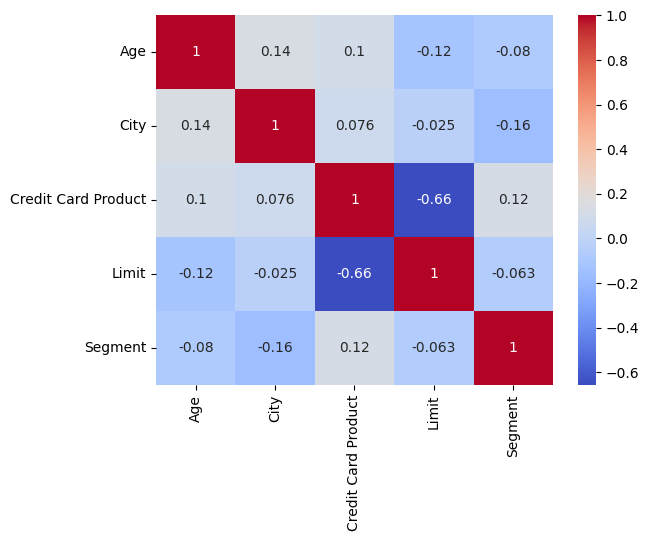

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()
